In [1]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


plt.rc('font', family='Malgun Gothic')  # 폰트 지정
plt.rc('axes', unicode_minus=False)  # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'  # 그래프 글씨 뚜렷


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)


seed_everything(42)

In [2]:
df_train = pd.read_csv("../data/preprocessed/df_train001.csv")

---

In [3]:
from prophet import Prophet

In [4]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(df_train['일시'])
df['y'] = df_train['평균기온']

In [5]:
# 모델 초기화
model = Prophet(growth='flat')

In [6]:
model.fit(df)

21:41:23 - cmdstanpy - INFO - Chain [1] start processing
21:41:23 - cmdstanpy - INFO - Chain [1] done processing


---

In [7]:
sub_file = pd.read_csv("../data/original/sample_submission.csv")

In [8]:
len(sub_file)

358

In [9]:
# 향후 365일에 대한 데이터프레임 생성
future = model.make_future_dataframe(periods=358)

In [10]:
# 예측
forecast = model.predict(future)

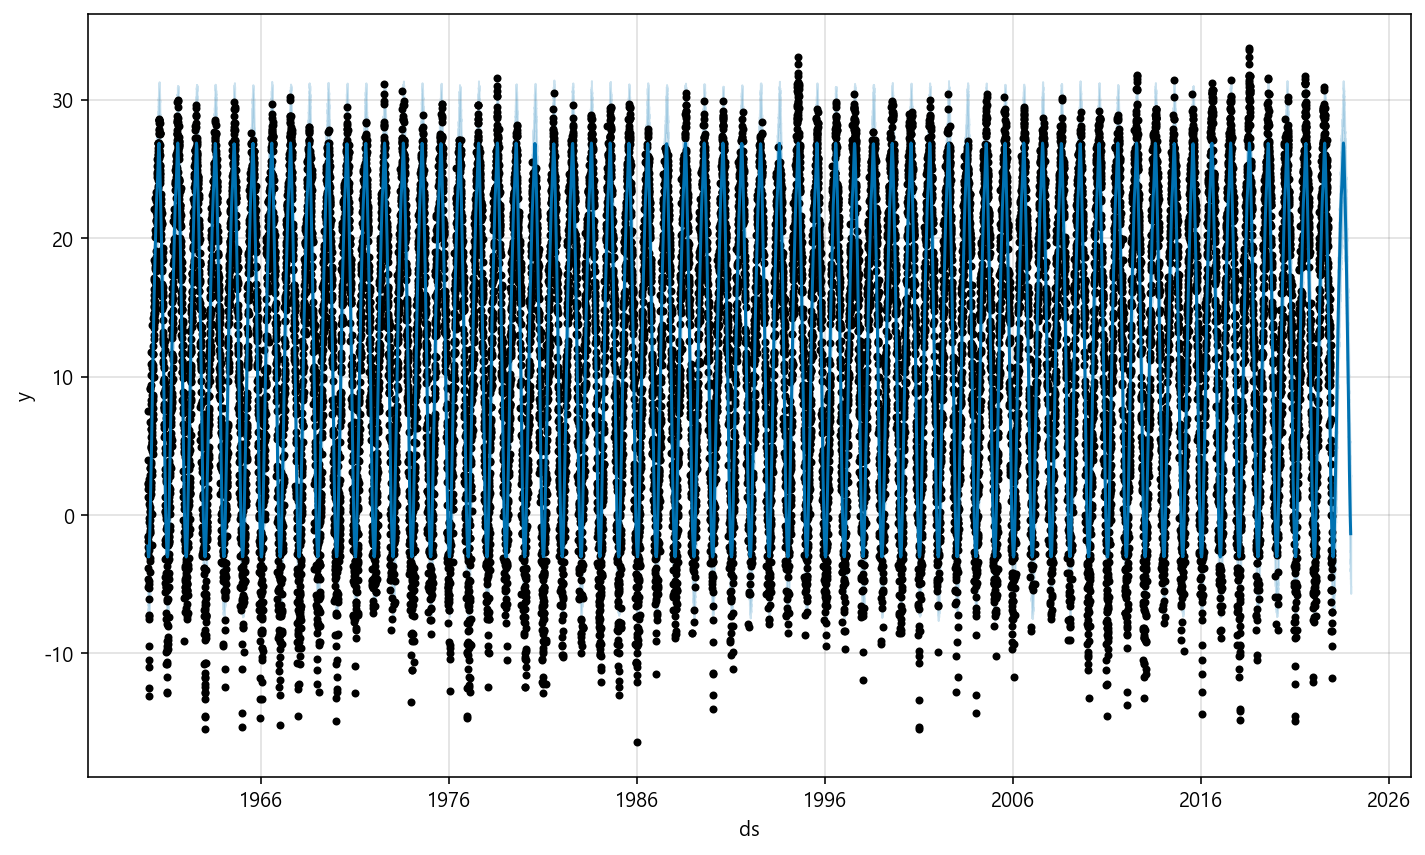

In [11]:
# 예측 결과 확인
fig = model.plot(forecast)

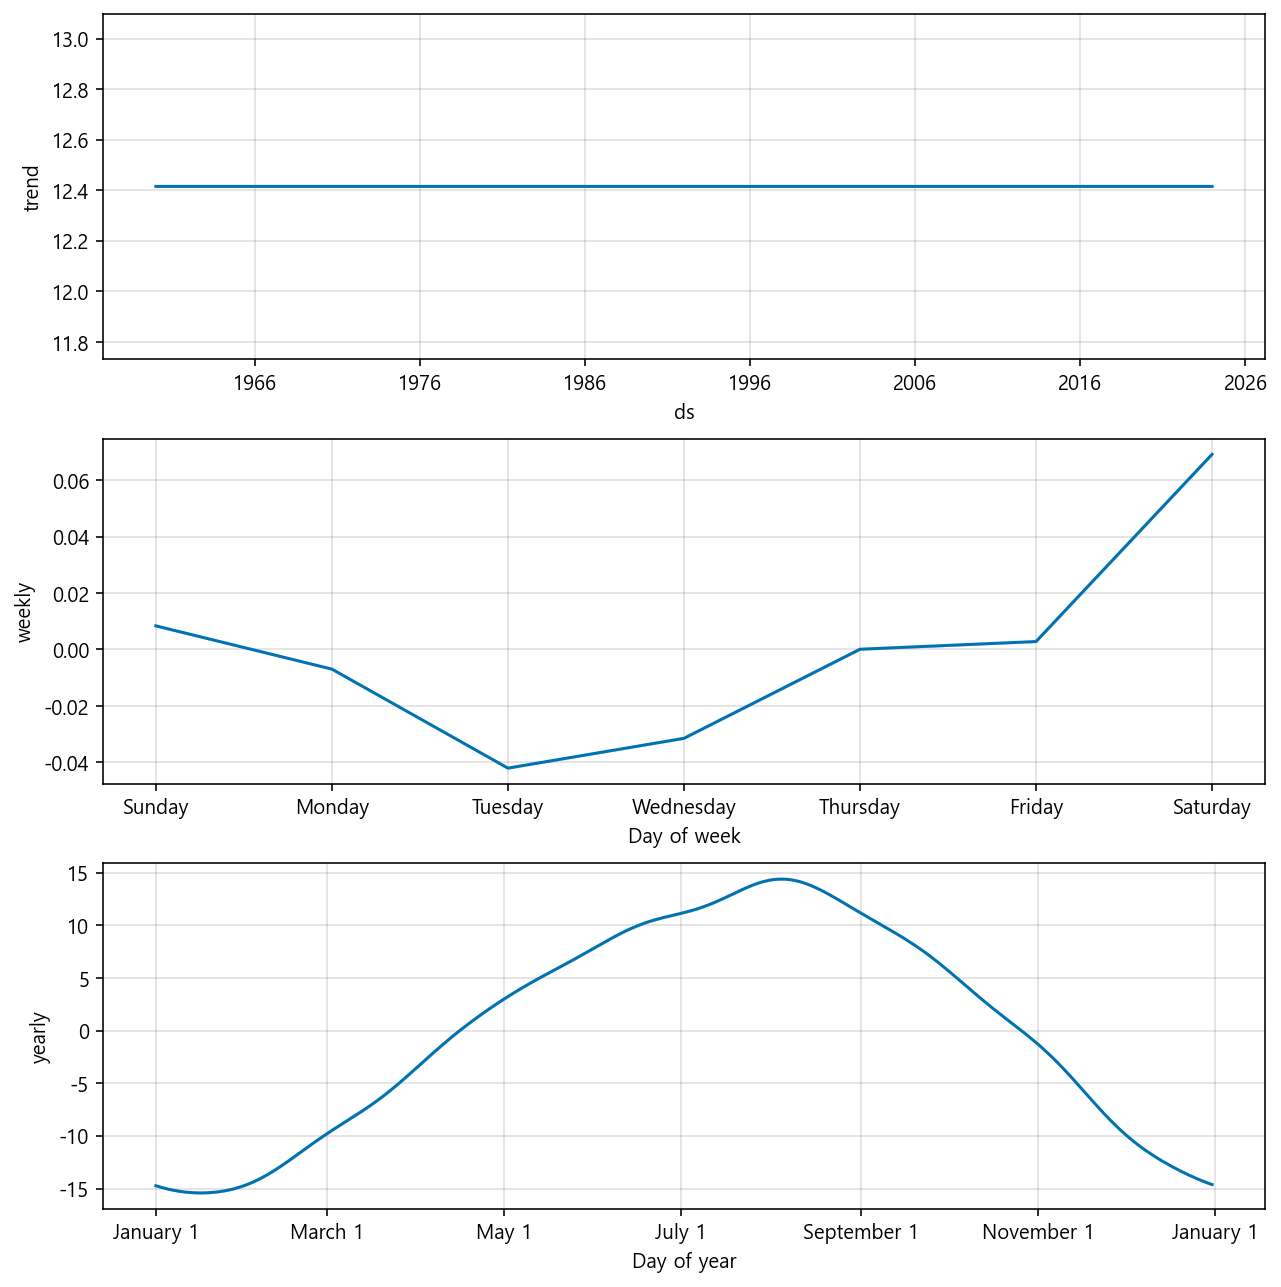

In [12]:
fig_components = model.plot_components(forecast)

<AxesSubplot:>

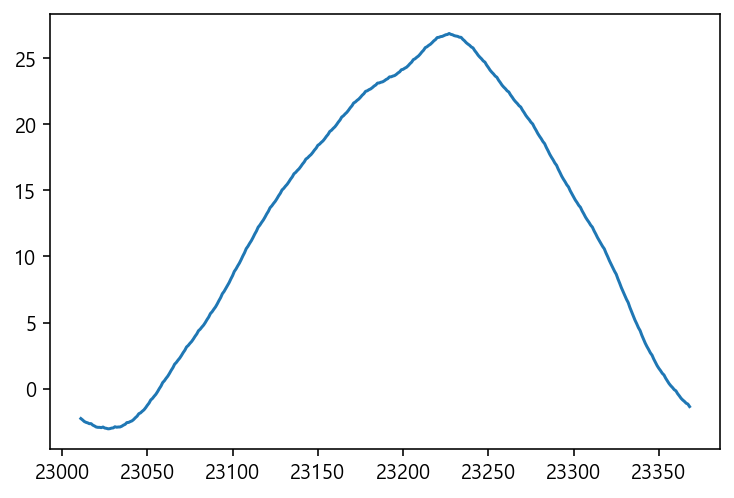

In [13]:
forecast['yhat'][-358:].plot()

In [14]:
sub_file['평균기온'] = forecast['yhat'][-358:].values

In [15]:
sub_file.to_csv("../data/sub/012_prophet_002.csv",
                index=False, encoding='utf-8')

---

In [16]:
import joblib

In [17]:
joblib.dump(model, '../model/prophet_002.pkl')

['../model/prophet_002.pkl']

In [18]:
loaded_model = joblib.load('../model/prophet_002.pkl')